In [ ]:
from tokenization_utils import *
import json
from tqdm.notebook import tqdm
import jsonlines

# bpe_model = FastBPEMode(codes=os.path.abspath(BPE_path), vocab_path=None)
# reloaded = torch.load(model_path, map_location="cpu")
# dico = Dictionary(reloaded["dico_id2word"], reloaded["dico_word2id"], reloaded["dico_counts"])
# dico = Dictionary.read_vocab(Roberta_BPE_path)
# split_dict = load_split_dict()
# test_list, val_list = get_eval_list(split_dict)

# Run DOBF

In [7]:
# Manage experiments
model_path = "/home/mingzhu/CodeModel/CodeGen/dobf_plus_denoising.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
# pair_data_tok_full pair_data_tok_1 pair_data_tok_-1
exp_prefix = "transcoder_dobf_g4g_program_transfer_"
model_exp_prefix = "transcoder_dobf_g4g_beam_10_"
# transcoder_dobf_g4g_program_transfer_ transcoder_dobf_g4g_program_ transcoder_dobf_g4g_
# transcoder_dobf_g4g_beam_10_ transcoder_dobf_g4g_beam_10_3r_

langs = file_extensions.keys()
# langs = ['Java', "C++", "C#"] # "Python"

prefix = "transcoder_dobf_g4g_"
prefix = "transcoder_dobf_g4g_newline_"

# Train dobf on snippets
model_path = "/home/mingzhu/CodeModel/CodeGen/dobf_plus_denoising.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_1/"
exp_prefix = prefix + "beam_5_"
model_exp_prefix = ""
max_epoch = 50
max_len = 100
beam_size = 5
# get_train_commands(langs, model_path, data_path_prefix, exp_prefix, model_exp_prefix,
#                        max_epoch=max_epoch, max_len=max_len, beam_size=beam_size,
#                        is_reloaded=True, is_dobf=True, is_transferred=False, is_print=True)

# Train dobf on program
model_path = "/home/mingzhu/CodeModel/CodeGen/dobf_plus_denoising.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
exp_prefix = prefix + "program_"
model_exp_prefix = ""
max_epoch = 50
max_len = 400
beam_size = 5
# get_train_commands(langs, model_path, data_path_prefix, exp_prefix, model_exp_prefix,
#                        max_epoch=max_epoch, max_len=max_len, beam_size=beam_size,
#                        is_reloaded=True, is_dobf=True, is_transferred=False, is_print=True)

# Train dobf on program with pre-trained snippet model
model_path = "/home/mingzhu/CodeModel/CodeGen/dobf_plus_denoising.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
exp_prefix = prefix + "program_transfer_"
model_exp_prefix = prefix + "beam_10_"
max_epoch = 50
max_len = 400
beam_size = 5
get_train_commands(langs, model_path, data_path_prefix, exp_prefix, model_exp_prefix,
                       max_epoch=max_epoch, max_len=max_len, beam_size=beam_size,
                       is_reloaded=True, is_dobf=True, is_transferred=True, is_print=True)




============== Java C++ =============
python train.py --exp_name transcoder_dobf_g4g_newline_program_transfer_Java_C++ --dump_path /home/mingzhu/CodeModel/CodeGen/dumppath1 --data_path /home/mingzhu/CodeModel/g4g/pair_data_tok_full/C++-Java/ --mt_steps java_sa-cpp_sa --encoder_only False --n_layers 0  --lgs java_sa-cpp_sa --max_vocab 64000 --gelu_activation true --roberta_mode false   --amp 2  --fp16 true  --tokens_per_batch 3000  --group_by_size true --max_batch_size 128  --epoch_size 10000  --split_data_accross_gpu global  --has_sentences_ids true  --optimizer 'adam_inverse_sqrt,warmup_updates=10000,lr=0.0001,weight_decay=0.01'  --eval_bleu true   --eval_computation false   --generate_hypothesis true   --validation_metrics valid_java_sa-cpp_sa_mt_bleu --eval_only false --max_epoch 50 --beam_size 5 --max_len 400 --n_layers_encoder 12   --n_layers_decoder 6  --emb_dim 768   --n_heads 12   --reload_model /home/mingzhu/CodeModel/CodeGen/dumppath1/transcoder_dobf_g4g_newline_beam_10_Java_

# Run Transcoder

In [ ]:
prefix = "transcoder_g4g_"
prefix = "transcoder_g4g_newline_"
# langs = ['Java', "C++", "C#"] # "Python"

# Train transcoder on snippets
model_path = "/home/mingzhu/CodeModel/CodeGen/TransCoder_model_1.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_1/"
exp_prefix = prefix + "1_"
model_exp_prefix = ""
max_epoch = 50
max_len = 100
beam_size = 5
get_train_commands(langs, model_path, data_path_prefix, exp_prefix, model_exp_prefix,
                       max_epoch=max_epoch, max_len=max_len, beam_size=beam_size,
                       is_reloaded=True, is_dobf=False, is_transferred=False, is_print=True)

# Train transcoder on program
model_path = "/home/mingzhu/CodeModel/CodeGen/TransCoder_model_1.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
exp_prefix = prefix + "program_"
model_exp_prefix = ""
max_epoch = 50
max_len = 400
# beam_size = 5
# get_train_commands(langs, model_path, data_path_prefix, exp_prefix, model_exp_prefix,
#                        max_epoch=max_epoch, max_len=max_len, beam_size=beam_size,
#                        is_reloaded=True, is_dobf=False, is_transferred=False, is_print=True)

# Train transcoder on program with pre-trained snippet model
model_path = "/home/mingzhu/CodeModel/CodeGen/TransCoder_model_1.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
exp_prefix = prefix + "program_transfer_"
model_exp_prefix = prefix + "1_"

max_epoch = 50
max_len = 400
beam_size = 5
# get_train_commands(langs, model_path, data_path_prefix, exp_prefix, model_exp_prefix,
#                        max_epoch=max_epoch, max_len=max_len, beam_size=beam_size,
#                        is_reloaded=True, is_dobf=False, is_transferred=True, is_print=True)


# Run Transformer

In [ ]:
# Train transformer on snippets

prefix = "transformer_g4g_"
prefix = "transformer_g4g_newline_"

model_path = "/home/mingzhu/CodeModel/CodeGen/TransCoder_model_1.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_1/"
exp_prefix = prefix + "1_"
model_exp_prefix = ""
max_epoch = 50
max_len = 100
beam_size = 5
# get_train_commands(langs, model_path, data_path_prefix, exp_prefix, model_exp_prefix,
#                        max_epoch=max_epoch, max_len=max_len, beam_size=beam_size,
#                        is_reloaded=False, is_dobf=False, is_transferred=False, is_print=True)

# Train transformer on program
model_path = "/home/mingzhu/CodeModel/CodeGen/TransCoder_model_1.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
exp_prefix = prefix + "program_"
model_exp_prefix = ""
max_epoch = 50
max_len = 400
beam_size = 5
get_train_commands(langs, model_path, data_path_prefix, exp_prefix, model_exp_prefix,
                       max_epoch=max_epoch, max_len=max_len, beam_size=beam_size,
                       is_reloaded=False, is_dobf=False, is_transferred=False, is_print=True)

# Train transformer on program with pre-trained snippet model
model_path = "/home/mingzhu/CodeModel/CodeGen/TransCoder_model_1.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
exp_prefix = prefix + "program_transfer_"
model_exp_prefix = prefix + "1_"
max_epoch = 50
max_len = 400
beam_size = 5
# get_train_commands(langs, model_path, data_path_prefix, exp_prefix, model_exp_prefix,
#                        max_epoch=max_epoch, max_len=max_len, beam_size=beam_size,
#                        is_reloaded=True, is_dobf=False, is_transferred=True, is_print=True)

# Read Results

In [ ]:
import json
exp_prefix = "transcoder_g4g_newline_program_transfer" 
# transcoder_dobf_g4g_ transcoder_g4g_program_ transcoder_g4g_1_
# transcoder_dobf_g4g_beam_10_ transcoder_dobf_g4g_program_transfer_ transformer_g4g_1_
# transformer_g4g_program_ transcoder_dobf_g4g_beam_10_3r_program_transfer_
# transcoder_g4g_program_transfer_ transformer_g4g_program_transfer_
# transcoder_dobf_g4g_program_transfer_codexglue_
# transcoder_dobf_g4g_beam_10_codexglue_
# transcoder_dobf_g4g_program_
# transcoder_dobf_g4g_newline_beam_10_
hypo_collection_path = "./hypothesis_collection/Compilations/" 
read_results(exp_prefix, dump_path) #, hypo_collection_path=hypo_collection_path

### Format Results

In [ ]:
path = "/home/mingzhu/CodeModel/CodeXGLUE/Code-Code/code-to-code-trans/" #read_results
# or
path = "/home/mingzhu/CodeModel/CodeXGLUE/Code-Code/code-to-code-trans/code" #read_csv


### Get Exact Match (EM) of each experiment

In [ ]:
exp_prefix = "transcoder_dobf_g4g_beam_10_" 

read_results(exp_prefix, dump_path, 
                 print_result=False, print_em=True, print_copy=False, 
                 hypo_collection_path=None)

### Get Naive Copy of each language pair

In [ ]:
# Get naive copy bleu
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
evaluator_path = "/home/mingzhu/CodeModel/CodeXGLUE/Code-Code/code-to-code-trans/evaluator/"
# langs = file_extensions.keys()
langs = ["C++", "Java", "Python", "C#", "Javascript", "PHP", "C"]
for lang1 in langs:
    for lang2 in langs:
        if lang2 == lang1:
            continue
        langpair = lang1 + '-' + lang2
        data_path = data_path_prefix + langpair + "/"
        if not os.path.exists(data_path):
            langpair = lang2 + '-' + lang1
            data_path = data_path_prefix + langpair + "/"
#         print("==============", lang1, lang2, "=============")
        testfile1 = "test-" + langpair + "-tok" + file_extensions[lang1]
        testfile2 = "test-" + langpair + "-tok" + file_extensions[lang2]
        em_command = "python " + evaluator_path + "evaluator.py " + \
                    " -ref " + data_path + testfile2 + \
                    " -pre " + data_path + testfile1
        print(em_command)


In [ ]:
# Get naive copy codebleu
# First cd codebleu_path
codebleu_path = "/home/mingzhu/CodeModel/CodeXGLUE/Code-Code/code-to-code-trans/evaluator/CodeBLEU/"
for lang1 in langs:
    for lang2 in langs:
        if lang2 == lang1:
            continue
        langpair = lang1 + '-' + lang2
        data_path = data_path_prefix + langpair + "/"
        if not os.path.exists(data_path):
            langpair = lang2 + '-' + lang1
            data_path = data_path_prefix + langpair + "/"
#         print("==============", lang1, lang2, "=============")
        testfile1 = "test-" + langpair + "-tok" + file_extensions[lang1]
        testfile2 = "test-" + langpair + "-tok" + file_extensions[lang2]
        codebleu_command = "python " + codebleu_path + "calc_code_bleu.py " + \
                    " --refs " + data_path + testfile2 + \
                    " --hyp " + data_path + testfile1 + \
                    " --lang " + lang_map[lang2]
        print(codebleu_command)


# Baselines

### Run on CodeXGlue

In [ ]:
# change the data path to :
path = "/home/mingzhu/CodeModel/g4g/codeXglue_data/"

### Run CodeBERT (and other Huggingface baselines)

In [ ]:
path = "/home/mingzhu/CodeModel/CodeXGLUE/Code-Code/code-to-code-trans/code/"
# To run translation, use one script:
# run_translation.sh
# ----------------------------old scripts----------
# Applies to Graphcodebert, roberta, codeT5, etc
# scripts: run_*.sh
# run: bash run_*.sh 0 java cpp
# bash run_snippet2comment.sh 0 java comment
# bash run_program2desc.sh 0 java desc
# TODO:
# Result collection; Hypo collection;

In [21]:
# Code Search
path = "/home/mingzhu/CodeModel/CodeXGLUE/Text-Code/NL-code-search-Adv/code/"
# bs=code_inputs.shape[0]
# inputs=torch.cat((code_inputs,nl_inputs),0)
# outputs=self.encoder(inputs,attention_mask=inputs.ne(1))[1]

# code_vec=outputs[:bs]
# nl_vec=outputs[bs:]
# 先把nl和code叠起来，变成长度为2*batch_size的一个array
# 通过encoder得到vector表示，outputs: (2*bs, d_model)
# inputs: (2*bs, )
# outputs: (2*bs, d_model)
# code_vec: (bs, d_model)
# nl_vec: (bs, d_model)
# scores: (bs, 1, d_model) * (1, bs, d_model) = (bs, bs)

nl_vec = torch.randn(3, 10, requires_grad=True)
code_vec = torch.randn(3, 10, requires_grad=True)
scores=(nl_vec[:,None,:]*code_vec[None,:,:]).sum(-1)
print(scores.shape)
loss1 = loss(scores, torch.arange(3))
print(loss1)

torch.Size([3, 3])
tensor(2.1153, grad_fn=<NllLossBackward>)


### Run PLBART

In [ ]:
path = "/home/mingzhu/CodeModel/PLBART/scripts/code_to_code/translation/"
# data_prepro: 
# bash prepare_g4g_snippet.sh
# bash prepare_g4g_program.sh
# bash prepare_g4g_snippet2comment.sh
# bash prepare_g4g_program2desc.sh
# Result collection: CodeModel/PLBART/scripts/code_to_code/translation/plbart_prepro.ipynb

# bash run_*.sh 0 java cpp
# bash run_snippet2comment.sh 0 java comment
# bash run_program2desc.sh 0 java desc
# Collect hypotheses: output.hyp


### DFG/AST Exploration

In [ ]:
path = "/home/mingzhu/CodeModel/CodeBERT/GraphCodeBERT/translation/dfg.ipynb"


# Code Viewer

In [ ]:
snippet_data = "/home/mingzhu/CodeModel/g4g/pair_data_tok_1/"
program_data = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
code_viewer_path = "/home/mingzhu/CodeModel/CodeGen/code_viewer/"

def view_code(lang1, lang2, data_type, tag):
    lang_pair = lang1 + "-" + lang2
    if not os.path.exists(program_data + lang_pair):
        lang_pair = lang2 + "-" + lang1
    fn = tag + "-" + lang_pair + file_extensions[lang2]
    new_fn = data_type + "-" + fn + ".json"
    if data_type == "snippet":
        code_path = snippet_data + lang_pair + "/" + fn
    else:
        code_path = program_data + lang_pair + "/" + fn

    # if not os.path.exists(code_viewer_path + new_fn):
    format_hypo_new(code_path, code_viewer_path + new_fn, lang2)
    new_fmt = print_formatted_code(code_viewer_path+new_fn, True)
    return

def view_code_mono(lang1, lang2, data_type, tag):
    lang_pair = lang1 + "-" + lang2
    if not os.path.exists(program_data + lang_pair):
        lang_pair = lang2 + "-" + lang1
    fn = tag + "-" + lang_pair + file_extensions[lang2]
    new_fn = data_type + "-" + fn.split(".")[0] + ".json"
    if data_type == "snippet":
        code_path = snippet_data + lang_pair + "/" + fn
    else:
        code_path = program_data + lang_pair + "/" + fn

    # if not os.path.exists(code_viewer_path + new_fn):
    format_hypo_new(code_path, code_viewer_path + new_fn, lang2)
    new_fmt = print_formatted_code(code_viewer_path+new_fn, True)
    return

lang1 = "Python"
lang2 = "Java"
data_type = "program" #snippet
tag = "test" # train valid

view_code(lang1, lang2, data_type, tag)

# Stand-alone Detokenizer

In [14]:
# On Dhruv machine
path = "/home/reddy/ming/CodeModel/code_prepro.ipynb"
# On rail machine
path = "/home/mingzhu/CodeModel/CodeBERT/GraphCodeBERT/translation/code_prepro.ipynb"

# Token Type

In [ ]:
import pickle
program_data_map = "/home/mingzhu/CodeModel/g4g/map_data/"
token_type_path = "/home/mingzhu/CodeModel/CodeGen/token_type/new_codenet_tokenized_data/"
path_token = token_type_path + "token2type.pickle"
path_type = token_type_path + "type2token.pickle"
path_bpe = token_type_path + "token2bpe.pickle"
langs = ["C++", "Java", "Python", "C#", "Javascript", "PHP", "C"]
for lang in langs:
    tokenized_type_path = token_type_path + lang + "/"

def get_programs(lang):
    fn = program_data_map + lang + "-program-tok.jsonl"
    with open(fn) as infile:
        lines = infile.readlines()
    programs = []
    program_tokens = []
    for line in lines:
        dic = json.loads(line.strip())
        program_raw = " ".join(dic['tokens'])
        line = program_raw.replace("@@ ", "")
        program = detok_format(line, file_detokenizers[lang])
        programs.append(program)
        program_tokens.append(dic['tokens'])
    return programs, program_tokens


with open(path_token, 'rb') as infile:
    dic_token = pickle.load(infile)
with open(path_type, 'rb') as infile:
    dic_type = pickle.load(infile)
with open(path_bpe, 'rb') as infile:
    dic_bpe = pickle.load(infile)

lang = "Java"
java_programs, java_program_tokens = get_programs(lang)

In [ ]:
# dict_bpe_token = {lang:[] for lang in langs}
# 判断当前是不是identifier，还要排除string的情况（string的话，上一个token应该是"或者'）
# token2bpe好像有Bug, " Tree ▁ is ▁ foldable " ['"', 'Tree', '▁', 'is', 'fold@@', 'able']， 怎么少了一个“？
dict_bpe_type = {lang:[] for lang in langs}
for lang in langs:
    for token, bpe_list in dic_bpe[lang].items():
        for bpe in bpe_list:
            if token in dic_token[lang]:
                if "\"" in bpe_list:
                    
                if bpe not in dict_bpe_type:
                    dict_bpe_type[bpe] = dic_token[lang][token]
                elif dict_bpe_type[bpe] != dic_token[lang][token]:
                    print("dup", bpe, token, bpe_list, dic_token[lang][token], dict_bpe_type[bpe])

In [ ]:
lang_dic_token = dic_token[lang]
good_identifier_set = set()
line_dic = {i+1:[] for i in range(4)}
for program in java_programs:
#     print(program)
    lines = program.split("\n")
    for line in lines:
        tokens = line.strip().split()
        rule_set = set()
        new_set = set()
        
#         if "=" in tokens or tokens[0] in set(["int", "String"]):
#             if tokens[0] not in set(['return', 'import', 'for', 'if', 'else', "while", 'System', 'tree']):
#                 rule_set.add(line)
        if tokens[0] not in lang_dic_token:
            continue
        elif lang_dic_token[tokens[0]][0] == "identifier":
            bad_cases_identifier = set(['tree', 'System', 'dfs'])
            if tokens[-1] in [';', '{']:
                if tokens[0] not in bad_cases_identifier:
                    if tokens[0][0].isupper():
                        if len(tokens) > 1:
                            if tokens[1] == '.':
                                continue
                        if len(tokens) > 2:
                            if tokens[1] == '[' and tokens[2] != ']':
                                continue
                        good_identifier_set.add(tokens[0])
                        line_dic[1].append(line)
                    elif '=' in tokens:
                        good_identifier_set.add(tokens[0])
                        line_dic[2].append(line)
   
        elif lang_dic_token[tokens[0]][0] == "keyword" :
            bad_cases_keyword = set(['return', 'import', 'for', 'if', 'else', "while"])
            good_cases_keyword = set(['boolean', 'char', 'class', 'double', 
                                      'final', 'float', 'int', 'long', 'new', 
                                      'private', 'public', 'static', 'void', 'this'])
            if tokens[0] in good_cases_keyword:
                if tokens[-1] in [';', '{']:
                    if '=' in tokens:
                        line_dic[3].append(line)
                    else:
                        line_dic[4].append(line)
#         for x in rule_set:
#             if x not in new_set:
#                 print("aaa", x)
        
#     break

In [ ]:
def is_define_java(line, lang_dic_token):
    tokens = line.strip().split()
    flag = False
    if tokens[0] not in lang_dic_token:
        return flag
    elif lang_dic_token[tokens[0]][0] == "identifier":
        bad_cases_identifier = set(['tree', 'System', 'dfs'])
        if tokens[0] not in bad_cases_identifier:
            if tokens[0][0].isupper():
                if len(tokens) > 1:
                    if tokens[1] == '.':
                        return flag
                if len(tokens) > 2:
                    if tokens[1] == '[' and tokens[2] != ']':
                        return flag
                flag = True
    elif lang_dic_token[tokens[0]][0] == "keyword" :
        good_cases_keyword = set(['boolean', 'char', 'class', 'double', 
                                  'final', 'float', 'int', 'long', 'new', 
                                  'private', 'public', 'static', 'void', 'this'])
        if tokens[0] in good_cases_keyword:
            flag = True
    return flag

is_define_java("class BinaryTree ", lang_dic_token)

In [ ]:
lang_dic_token = dic_token[lang]

for program, program_tokens in zip(java_programs, java_program_tokens):
    lines = program.split("\n")
    program_raw_tokens = []
    for line in lines:
        program_raw_tokens.extend(line.split())
        program_raw_tokens.append('\n')
    
    last_line = lines[0]
    line_n = 0
    for token_raw in program_raw_tokens:
        if token_raw == "\n":
            line_n += 1
            if line_n < len(lines) - 1:
                last_line = lines[line_n]
            continue
        if token_raw in dic_bpe[lang]:
            bpe_tokens = dic_bpe[lang][token_raw]
            for i, token in enumerate(bpe_tokens):
                if (token in lang_dic_token and 
                    lang_dic_token[token] == "identifier") or ((token.endswith("@@") 
                                                                    or bpe_tokens[i-1].endswith("@@")) 
                                                                    and "\"" not in last_line
                                                                    and "\'" not in last_line):

#                     print(last_line, token_raw, token)
                    pass
        elif not ("\"" in token_raw or "\'" in token_raw):
            print("Exception", last_line, token_raw)

        # 这里判断identifier可能有些问题，因为string也会有@@
        

In [ ]:
import javalang
tokens = javalang.tokenizer.tokenize('gap == ( gap * 10 );')
parser = javalang.parser.Parser(tokens)
parser.parse_expression()


In [ ]:
key = 2
for line in line_dic[key]:
    print(line)

# Conditional Generation

### Generate conditional hypotheses

In [ ]:
# Train transcoder on program with pre-trained snippet model
prefix = "transcoder_g4g_"

model_path = "/home/mingzhu/CodeModel/CodeGen/TransCoder_model_1.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
exp_prefix = prefix + "program_transfer_"
model_exp_prefix = prefix + "program_transfer_"

max_epoch = 50
max_len = 400
# remember to change the beam size!
beam_size = 1

precont_topk=100
cont_lambda=0.7
max_tok_num=20
get_train_commands(langs, model_path, data_path_prefix, exp_prefix, model_exp_prefix,
                       max_epoch=max_epoch, max_len=max_len, beam_size=beam_size,
                       is_reloaded=True, is_dobf=False, is_transferred=True, is_print=True,
                       is_cont=True, precont_topk=precont_topk, 
                       cont_lambda=cont_lambda, max_tok_num=max_tok_num)


### Copy the generated hypotheses

In [ ]:
import json
exp_prefix = "transcoder_g4g_program_transfer_" 
hypo_collection_path = "./hypothesis_collection/Compilations/" 
read_cont_results(exp_prefix, dump_path, hypo_collection_path=hypo_collection_path)
# read_cont_results(exp_prefix, dump_path)

### Format the generated hypotheses

In [ ]:
format_raw_code(hypo_collection_path, exp_prefix)

### Generate Side by Side Comparison between with conditional generation and without

In [ ]:
hypo_path = "./hypothesis_collection/Compilations/transcoder_g4g_program_transfer_C++_Java/"
# transcoder_g4g_program_transfer_C++_Python
# transcoder_g4g_program_transfer_C++_Java
hypo_cont = "hyp0.cpp_sa-java_sa.test_beam0_100_0.7_20_81.11.json"
hypo_nocont = "hyp0.cpp_sa-java_sa.test_beam0_0_0_0_80.57.json"
ref = "ref.cpp_sa-java_sa.test.json"
# ref.cpp_sa-python_sa.test.json
# "ref.cpp_sa-java_sa.test.json"
# Change False to True to print the formatted code
hypo_cont_fmt = print_formatted_code(hypo_path+hypo_cont, False)
hypo_nocont_fmt = print_formatted_code(hypo_path+hypo_nocont, True)
# ref_fmt = print_formatted_code(hypo_path+ref, True)

# get_diff(hypo_nocont_fmt, hypo_cont_fmt)

### Compile with compiler

In [ ]:
path = "/home/mingzhu/CodeModel/CodeGen/hypothesis_collection/Compilations/Comps.ipynb"


### Train compilation classifier

In [ ]:
import javalang
source = """import java . io . * ;
import java . util . * ;
class CountTriangles {
  static int findNumberOfTriangles ( int arr [ ] ) {
    int n = arr . length ;
    Arrays . sort ( arr ) ;
    int count = 0 ;
    for ( int i = 0 ; i < n - 2 ; ++ i ) {
      int k = i + 2 ;
      for ( int j = i + 1 ; j < n ; ++ j ) {
        while ( k < n && arr [ i ] + arr [ j ] > arr [ k ] ) ++ k ;
        if ( k > j ) count += k - j - 1 ;
      }
    }
    return count ;
  }
  public static void main ( String [ ] args ) {
      ArrayList<String> cars = new ArrayList<String>();
      int arr[] = {
      10 , 21 , 22 , 100 , 101 , 200 , 300 };
      System . out . println ( "Total number of triangles is " + findNumberOfTriangles ( arr ) ) ;
    }
  }"""

source_tokens = []
types = set()
for token in javalang.tokenizer.tokenize(source):
    source_tokens.append((type(token).__name__, token.value))
    types.add(type(token).__name__)
print(source_tokens)

In [ ]:
from cubert import python_tokenizer
from cubert import unified_tokenizer

# DOBF/Transcoder Data pre-processing pipeline

### Pre-processing into map_data

In [ ]:
# CoST data for public release (with new_line):
path = "/home/mingzhu/CodeModel/g4g/CoST_data/with_new_line/CoST_data.zip"

In [1]:
path = "/home/mingzhu/CodeModel/g4g/test_get_map_data.ipynb"

### Tokenization

In [ ]:
# From scratch:
# tokenize_data("program", "program_formatted", ["problem_desc"], ["desc_"])
# tokenize_data("mapping", "snippet", ["comment", "problem_desc"], ["comment_", "desc_"])
# -----------------------------------------------------
# Use cached files:
cache_path  = "/home/mingzhu/CodeModel/g4g/map_data_full/"
use_cache(cache_path, "program", "program_formatted", ["problem_desc"], ["desc_"])
use_cache(cache_path, "mapping", "snippet", ["comment", "problem_desc"], ["comment_", "desc_"])

In [10]:
cache_path  = "/home/mingzhu/CodeModel/g4g/XLCoST_data/"


### Train/Valid/Test Split

In [4]:
# Split information
# ------------------------------------------------
# C 83 83 302
# C 0.17735042735042736 0.17735042735042736 0.6452991452991453
# PHP 230 230 1843
# PHP 0.09986973512809379 0.09986973512809379 0.8002605297438125
# Javascript 792 792 5165
# Javascript 0.11735071862498148 0.11735071862498148 0.765298562750037
# C# 792 792 5845
# C# 0.10660923408264908 0.10660923408264908 0.7867815318347019
# Python 792 792 5931
# Python 0.10538922155688622 0.10538922155688622 0.7892215568862275
# Java 792 792 6047
# Java 0.10378718385532695 0.10378718385532695 0.792425632289346
# C++ 792 792 6205
# C++ 0.10168185903196816 0.10168185903196816 0.7966362819360637
# 792 792 6344
# 0.09989909182643794 0.09989909182643794 0.8002018163471241
# ------------------------------------------------
split_param_test = 0.1
split_param_valid = split_param_test
# Only need to run once
# split_dict = get_split_common_keys(split_param_test, split_param_valid, program_lang_dic)
# save_split_dict(split_dict)
# ------------------------------------------------
split_dict = load_split_dict()
test_list, val_list = get_eval_list(split_dict)

### Generate translation data

In [ ]:
# read tokenized files
json_dict, id_lang_dic, program_lang_dic = read_tok_file()

# Generate snippet pairs
get_n_snippets(1, test_list, val_list, program_lang_dic, id_lang_dic)
# -----------------------------------------------------

# Generate program pairs
# get_programs(test_list, val_list, id_lang_dic, program_lang_dic)
program_json_dict, program_id_lang_dic = read_program_tok_file()
get_program_new(test_list, val_list, program_json_dict, program_id_lang_dic)
# -----------------------------------------------------

# Generate snippet pairs
# get_n_snippets(3, test_list, val_list, recursive=True)

# -----------------------------------------------------
# Binarize the pairwise files
binarize("/home/mingzhu/CodeModel/g4g/pair_data_tok_1/", 
         file_extensions.keys(), "data/bpe/cpp-java-python/vocab")
binarize("/home/mingzhu/CodeModel/g4g/pair_data_tok_full/", 
         file_extensions.keys(), "data/bpe/cpp-java-python/vocab")
# -----------------------------------------------------

# Use the val and test file from pair_data_tok_1
# copy_val_test_files(path1, path2)

In [2]:
json_dict, id_lang_dic, program_lang_dic = read_tok_file()
program_json_dict, program_id_lang_dic = read_program_tok_file()


In [18]:
program_json_dict['Java'][0].keys()

dict_keys(['idx', 'program', 'program_formatted', 'snippet_ids', 'problem_desc', 'tokens', 'bpe', 'desc_tokens', 'desc_bpe'])

In [20]:
problem_desc_dict = {}
total_num_snippet = 0
for lang in langs:
    dic = program_id_lang_dic[lang]
    for k, v in dic.items():
        if v['problem_desc'] in problem_desc_dict:
            problem_desc_dict[v['problem_desc']] += 1
        else:
            problem_desc_dict[v['problem_desc']] = 1
    break
# print(len(snippet_set))
print(problem_desc_dict)

{'Postfix to Infix': 1, 'Change a Binary Tree so that every node stores sum of all nodes in left subtree': 1, 'The Stock Span Problem': 3, 'Next Greater Element': 1, 'Convert a Binary Tree into its Mirror Tree': 2, 'Number of NGEs to the right': 2, 'Maximum product of indexes of next greater on left and right': 1, 'The Celebrity Problem': 2, 'Expression Evaluation': 1, 'Iterative Tower of Hanoi': 1, 'Delete middle element of a stack': 1, 'Sorting array using Stacks': 1, 'Convert a Binary Tree into Doubly Linked List in spiral fashion': 1, 'Reverse individual words': 1, 'Count subarrays where second highest lie before highest': 1, 'Check if an array is stack sortable': 1, 'Largest Rectangular Area in a Histogram | Set 2': 1, 'Program for Tower of Hanoi': 1, 'Find maximum of minimum for every window size in a given array': 2, 'Length of the longest valid substring': 3, 'Convert a tree to forest of even nodes': 1, 'Minimum number of bracket reversals needed to make an expression balanced'

### Generate text-code data

In [ ]:
# comment-code
get_n_snippets_mono(1, 'comment', test_list, val_list, program_lang_dic, id_lang_dic)
# program-desc
get_program_new_mono("desc", test_list, val_list, program_id_lang_dic)
# desc-comment-program
get_program_new_mono_comment("desc", test_list, val_list, id_lang_dic, program_id_lang_dic)

# Binarize the pairwise files
# binarize("/home/mingzhu/CodeModel/g4g/pair_data_tok_1_comment/", 
#          file_extensions.keys(), "data/bpe/cpp-java-python/vocab")
# binarize("/home/mingzhu/CodeModel/g4g/pair_data_tok_full_desc/", 
#          file_extensions.keys(), "data/bpe/cpp-java-python/vocab")

In [ ]:
# TODO:
# Add NL support to transcoder (How did they do it?)
# https://github.com/facebookresearch/CodeGen/blob/
# cbbce280314d687a0b4d38295b3868bc572a574c/CodeXGLUE/Code-Text/code-to-text/code/run.py#L50
# They use pre-trained XLM to handle text. Apparently DOBF checkpoints can be directly loaded into xlm
# 既然这样，我就没必要对text-code dataset做binarize吧？可以直接用它们的脚本
# 不过如果想用transcoder做baseline，还是需要NL支持，还是需要Binarize。

def binarize_mono(root, langs, mono_key, voc_path):
    for lang1 in langs:
        print(lang1)
        lang1_lower = lang_lower[lang1]
        path = root + lang1 + '-' + mono_key + '/'
        fns = os.listdir(path)
        for fn in fns:
            if fn.endswith(".pth"):
                os.remove(os.path.join(path, fn))
        for tag in tags:
            fn_prefix = path + tag + "-" + lang1 + "-" + mono_key
            fn1 = fn_prefix + file_extensions[lang1]
            fn2 = fn_prefix + ".txt"
            if tag != 'train':
                fn1 = fn_prefix + "-trans" + file_extensions[lang1]
                fn2 = fn_prefix + "-trans" + ".txt"
            tag_pth = tag
            if tag == 'val':
                tag_pth = 'valid'
            fn_pth_prefix = path + tag_pth + "." + lang1_lower + "_sa-" + lang2_lower + "_sa."
            fn1_pth = fn_pth_prefix + lang1_lower + "_sa.pth"
            fn2_pth = fn_pth_prefix + lang2_lower + "_sa.pth"
            fn_pth_prefix_alt = path + tag_pth + "." + lang2_lower + "_sa-" + lang1_lower + "_sa."
            fn1_pth_alt = fn_pth_prefix_alt + lang1_lower + "_sa.pth"
            fn2_pth_alt = fn_pth_prefix_alt + lang2_lower + "_sa.pth"

            XLM_preprocess(voc_path, fn1, fn1_pth)
            XLM_preprocess(voc_path, fn2, fn2_pth)
            copyfile(fn1_pth, fn1_pth_alt)
            copyfile(fn2_pth, fn2_pth_alt)

### Dataset Stats

In [70]:
def print_stat_dict(label, dic):
    print(label)
    line = ""
    sum_v = 0
    for lang in langs:
        sum_v += dic[lang]
        line += str(dic[lang]) + "\t"
    line += str(sum_v) + "\t"
    print(line)
    return

snippet_line_num_dict = {lang:[] for lang in langs}
snippet_tokens_num_dict = {lang:[] for lang in langs}
snippet_comment_tokens_num_dict = {lang:[] for lang in langs}
snippet_num_dict = {}
for lang in langs:
    snippet_num_dict[lang] = len(id_lang_dic[lang])
    for k, snippet in id_lang_dic[lang].items():
        lines = snippet['snippet'].split('\n')
        snippet_line_num_dict[lang].append(len(lines))
        snippet_tokens_num_dict[lang].append(len(snippet['tokens']))
        snippet_comment_tokens_num_dict[lang].append(len(snippet['comment_tokens']))
print_stat("Average number of lines", snippet_line_num_dict)
print_stat("Average number of tokens", snippet_tokens_num_dict)
print_stat("Average number of comment tokens", snippet_comment_tokens_num_dict)
print_stat_dict("Number of snippets", snippet_num_dict)


Average number of lines
3.46	3.76	2.45	3.88	3.23	3.87	4.11	3.41	

Average number of tokens
21.76	24.26	21.84	23.23	22.33	28.06	25.57	22.94	

Average number of comment tokens
8.35	8.23	8.08	8.3	8.0	8.51	9.69	8.23	

Number of snippets
73241	70682	63445	68272	54087	13223	3682	346632	


In [71]:
# Average number of tokens in each program
def get_avg(l):
    return sum(l)/len(l)

def print_stat(label, dic):
    print(label)
    big_l = []
    line = ""
    for lang in langs:
        avg = get_avg(dic[lang])
        line += str(round(avg, 2)) + "\t"
        big_l += dic[lang]
#         print(lang, avg)
    overall_avg = get_avg(big_l)
#     print("Overall", overall_avg)
    line += str(round(overall_avg, 2)) + "\t"
    print(line)
    print()
    return

program_snippet_num_dict = {lang:[] for lang in langs}
program_line_num_dict = {lang:[] for lang in langs}
program_tokens_num_dict = {lang:[] for lang in langs}
program_desc_tokens_num_dict = {lang:[] for lang in langs}
program_num_dict = {}

for lang in langs:
    program_num_dict[lang] = len(program_json_dict[lang])
    for program in program_json_dict[lang]:
        lines = program['program_formatted'].split('\n')
        program_line_num_dict[lang].append(len(lines))
        program_snippet_num_dict[lang].append(len(program['snippet_ids']))
        program_tokens_num_dict[lang].append(len(program['tokens']))
        program_desc_tokens_num_dict[lang].append(len(program['desc_tokens']))
print_stat("Average number of snippets per program", program_snippet_num_dict)
print_stat("Average number of lines per program", program_line_num_dict)
print_stat("Average number of tokens per program",program_tokens_num_dict)
print_stat("Average number of desc tokens per program",program_desc_tokens_num_dict)
print_stat_dict("Number of programs", program_num_dict)


Average number of snippets per program
9.4	9.26	8.44	9.19	8.01	5.74	7.87	8.69	

Average number of lines per program
32.54	34.84	20.7	35.62	25.88	22.23	32.32	29.6	

Average number of tokens per program
204.62	224.74	184.81	213.52	178.92	161.1	201.87	199.5	

Average number of desc tokens per program
10.73	10.73	10.81	10.77	11.0	10.01	8.15	10.72	

Number of programs
7789	7631	7515	7429	6749	2303	468	39884	


# Multilingual Training

### Create all2all dataset

In [ ]:
# Create all2all dataset
path1 = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
path2 = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full_all_2_one/"

langs = file_extensions.keys()
path_all = path2 +  "All/"
if not os.path.exists(path_all):
    os.makedirs(path_all)
for lang2 in langs:
    path_lang2 = path2 + lang2 + "/"
    fns = os.listdir(path_lang2)
    for fn in fns:
        if fn.endswith('.pth') :
            copyfile(path_lang2 + fn, path_all + fn)


### Create all2one dataset

In [ ]:
# Create all2one dataset
path1 = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full/"
path2 = "/home/mingzhu/CodeModel/g4g/pair_data_tok_full_all_2_one/"

langs = file_extensions.keys()

if not os.path.exists(path2):
    os.makedirs(path2)
    
for lang2 in langs:
    path_new = path2 + lang2 + "/"
    if not os.path.exists(path_new):
        os.makedirs(path_new)
    for lang1 in langs:
        if lang2 == lang1:
            continue
        print(lang1, lang2)
        lang1_lower = lang_lower[lang1]
        lang2_lower = lang_lower[lang2]

        path1_root = path1 + lang1 + '-' + lang2 + '/'
        if not os.path.exists(path1_root):
            path1_root = path1 + lang2 + '-' + lang1 + '/'
        lang_pair = lang1_lower + "_sa-" + lang2_lower + "_sa"
        lang_pair_alt = lang2_lower + "_sa-" + lang1_lower + "_sa"
        fns = os.listdir(path1_root)
        for fn in fns:
            if fn.endswith('.pth') and ((lang_pair in fn) or (lang_pair_alt in fn)) :
                copyfile(path1_root + fn, path_new + fn)
                new_fn_list = fn.split(".")
                copyfile(path_new + fn, path_new + ".".join([new_fn_list[0]] + new_fn_list[-2:]))
          

### Get multilingual train commands 

In [ ]:
# get_multilingual_train_commands 
model_path = "/home/mingzhu/CodeModel/CodeGen/dobf_plus_denoising.pth"  
data_path_prefix = "/home/mingzhu/CodeModel/g4g/pair_data_tok_all_2_one/"
exp_prefix = "transcoder_dobf_g4g_beam_10_all_2_"
langs = file_extensions.keys()
# langs = ['Java', 'Python', "C++", "C#"]
model_exp_prefix = ""
max_epoch = 200
max_len = 100
beam_size = 10
get_multilingual_train_commands(langs, model_path, data_path_prefix, exp_prefix, model_exp_prefix,
                       max_epoch=max_epoch, max_len=max_len, beam_size=beam_size,
                       is_reloaded=True, is_dobf=True, is_transferred=False, is_print=True, is_ae=True)

### Read all2all results

In [ ]:
dump_path = "/home/mingzhu/CodeModel/CodeGen/dumppath1/"
# Collect the generated hypos
hypo_collection_path = "./hypothesis_collection/Transcoder_transfer/" #multilingual Transformer DOBF
exp_prefix = "transcoder_dobf_g4g_beam_10_program_transfer_all_2_All" 
#  transcoder_dobf_g4g_beam_10_all_2_ transcoder_dobf_g4g_beam_10_program_transfer_all_2_All
# transcoder_dobf_g4g_beam_10_program_all_2_All
read_all_2_results(exp_prefix, dump_path)

## AST

In [4]:
from dfg_ast_utils import *
path = "/home/mingzhu/CodeModel/CodeBERT/GraphCodeBERT/translation/dfg.ipynb"

In [5]:
cs_code = "using System;using System.Linq;namespace AOJ{class Program{public static void Main(string[] args){foreach(var i in Enumerable.Range(1, 9)){foreach(var j in Enumerable.Range(1, 9)){Console.WriteLine('{0}x{1}={2}', i, j, i*j);}}}}}"
cpp_code = "#include<iostream>using namespace std;int main(){cin.tie(0);ios::sync_with_stdio(false);for(int i=1;i<10;i++)for(int j=1;j<10;j++)cout << i << 'x' << j << '='' << i*j << '\n';}"
java_code = "class Main {public static void main(String[] args){for(int i = 1; i < 10; ++i){for(int j = 1; j < 10; ++j){System.out.println(Integer.toString(i)+'x'+Integer.toString(j)+'='+Integer.toString(i*j));}}}} "
python_code = """for i in range(1, n):\n\tcounter = 1\n\twhile ((i - counter) >= 0 and\n\t\tA[i] >= A[i - counter]):\n\t\tcounter += ans[i - counter]\n\tans[i] = counter"""
js_code = "prefix[0] = prefix[1] = 0;for (let p = 2; p <= MAX; p++) {prefix[p] = prefix[p - 1];if (prime[p])prefix[p]++;}}"
php_code = "for ($p = 2; $p <= $MAX; $p++){$prefix[$p] = $prefix[$p - 1];if ($prime[$p])$prefix[$p]++;}}"
c_code = """void print(struct Node *root){if (root != NULL){print(root->left);printf("%d ",root->data);print(root->right);}}"""



In [7]:
cpp_root_node = get_ast(cpp_code, cpp_parser)
java_root_node = get_ast(java_code, java_parser)
py_root_node = get_ast(python_code, py_parser)
cs_root_node = get_ast(cs_code, cs_parser)
js_root_node = get_ast(js_code, js_parser)
php_root_node = get_ast(php_code, php_parser)
c_root_node = get_ast(c_code, c_parser)

# py_small_root_node = get_ast(py_code_small, py_parser)


In [8]:
java_root, java_graph = get_graph(java_code, java_root_node)
cpp_root, cpp_graph = get_graph(cpp_code, cpp_root_node)
py_root, py_graph = get_graph(python_code, py_root_node)
cs_root, cs_graph = get_graph(cs_code, cs_root_node)
js_root, js_graph = get_graph(js_code, js_root_node)
php_root, php_graph = get_graph(php_code, php_root_node)
c_root, c_graph = get_graph(c_code, c_root_node)

In [9]:

dep_cap_k = 3
java_root, java_graph_pruned = get_graph_pruned(java_root, java_graph, dep_cap=dep_cap_k)
cpp_root, cpp_graph_pruned = get_graph_pruned(cpp_root, cpp_graph, dep_cap=dep_cap_k)
py_root, py_graph_pruned = get_graph_pruned(py_root, py_graph, dep_cap=dep_cap_k)
cs_root, cs_graph_pruned = get_graph_pruned(cs_root, cs_graph, dep_cap=dep_cap_k)
js_root, js_graph_pruned = get_graph_pruned(js_root, js_graph, dep_cap=dep_cap_k)
php_root, php_graph_pruned = get_graph_pruned(php_root, php_graph, dep_cap=dep_cap_k)
c_root, c_graph_pruned = get_graph_pruned(c_root, c_graph, dep_cap=dep_cap_k)

java_root, java_graph_sibs = get_graph_merge_sibs(java_root, java_graph)
cpp_root, cpp_graph_sibs = get_graph_merge_sibs(cpp_root, cpp_graph)
py_root, py_graph_sibs = get_graph_merge_sibs(py_root, py_graph)
cs_root, cs_graph_sibs = get_graph_merge_sibs(cs_root, cs_graph)
js_root, js_graph_sibs = get_graph_merge_sibs(js_root, js_graph)
php_root, php_graph_sibs = get_graph_merge_sibs(php_root, php_graph)
c_root, c_graph_sibs = get_graph_merge_sibs(c_root, c_graph)

java_root, java_graph_pruned_sibs = get_graph_merge_sibs(java_root, java_graph_pruned)
cpp_root, cpp_graph_pruned_sibs = get_graph_merge_sibs(cpp_root, cpp_graph_pruned)
py_root, py_graph_pruned_sibs = get_graph_merge_sibs(py_root, py_graph_pruned)
cs_root, cs_graph_pruned_sibs = get_graph_merge_sibs(cs_root, cs_graph_pruned)
js_root, js_graph_pruned_sibs = get_graph_merge_sibs(js_root, js_graph_pruned)
php_root, php_graph_pruned_sibs = get_graph_merge_sibs(php_root, php_graph_pruned)
c_root, c_graph_pruned_sibs = get_graph_merge_sibs(c_root, c_graph_pruned)



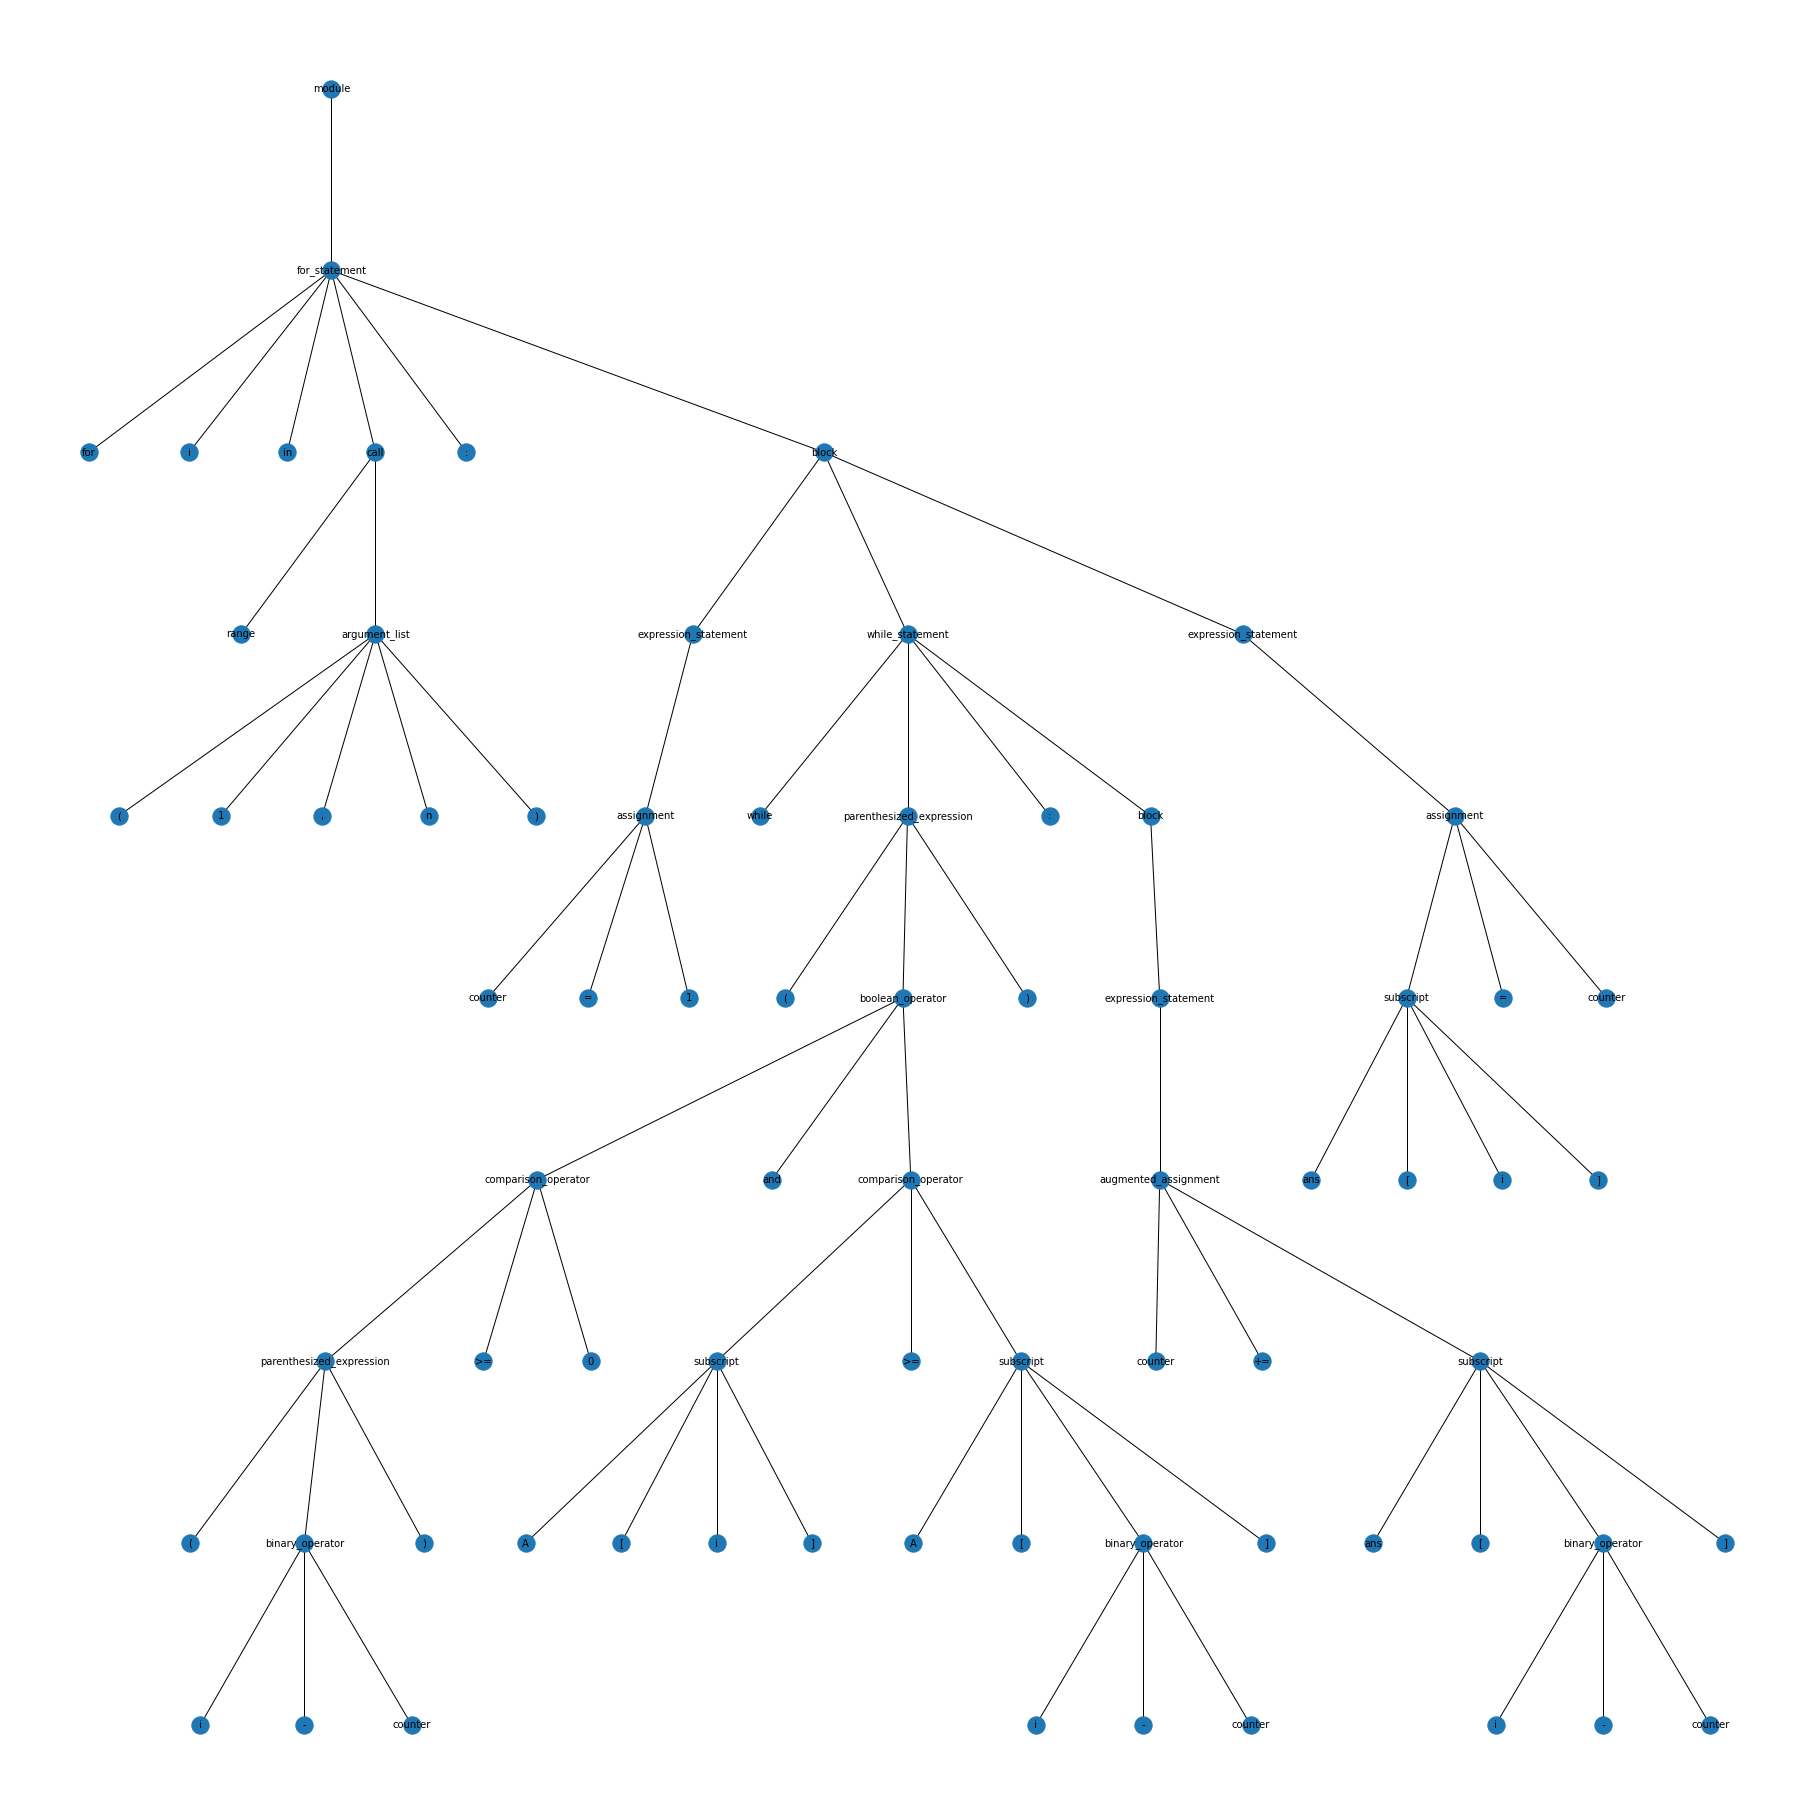

In [10]:
edge_list, labels = get_graph_data_new(py_root, py_graph)
# edge_list, labels = cpp_edge_list, cpp_labels
# edge_list, labels = py_edge_list, py_labels
# edge_list, labels = cs_edge_list, cs_labels
# edge_list, labels = js_edge_list, js_labels
# edge_list, labels = php_edge_list, php_labels
# edge_list, labels = c_edge_list, c_labels

G = nx.DiGraph()
G.add_edges_from(edge_list)
nx.nx_agraph.write_dot(G,'test.dot')
pos=graphviz_layout(G, prog='dot')
plt.figure(1,figsize=(25,25)) 
nx.draw(G, pos, with_labels=False, arrows=False)
nx.draw_networkx_labels(G,pos,labels,font_size=10,font_color='black')
plt.show()
# plt.savefig('nx_test.png')

In [ ]:
path = "/home/mingzhu/CodeModel/Project_CodeNet/datasets/transcoder_data_small2/XLM-syml/test.java_sa-python_sa.java_sa.pth"
path = "/home/mingzhu/CodeModel/g4g/pair_data_tok_all/Java-Python/transcoder_eval_files/test.java_sa-python_sa.java_sa.pth"
# path = "/home/mingzhu/CodeModel/g4g/pair_data_tok_all/Java-Python/test.java_sa-python_sa.java_sa.pth"

data = torch.load(path)

In [ ]:
py_tokens = py_tokenizer(python_code)
py_tokens_bpe = bpe_model.apply_bpe(" ".join(py_tokens)).split()

cs_tokens = cs_tokenizer(cs_code)
cs_tokens_bpe = bpe_model.apply_bpe(" ".join(cs_tokens)).split()

java_tokens = java_tokenizer(java_code)
java_tokens_bpe = bpe_model.apply_bpe(" ".join(java_tokens)).split()

js_tokens = js_tokenizer(js_code)
js_tokens_bpe = bpe_model.apply_bpe(" ".join(js_tokens)).split()

php_tokens = php_tokenizer(php_code)
php_tokens_bpe = bpe_model.apply_bpe(" ".join(php_tokens)).split()

cpp_tokens = cpp_tokenizer(cpp_code)
cpp_tokens_bpe = bpe_model.apply_bpe(" ".join(cpp_tokens)).split()

c_tokens = c_tokenizer(c_code)
c_tokens_bpe = bpe_model.apply_bpe(" ".join(c_tokens)).split()

In [ ]:
cpp_code = """#include<iostream> using namespace std; \n#define M 6 \n#define N 6 \nvoid floodFillUtil(char mat[][N], int x, int y, char prevV, char newV) { if (x < 0 x >= M y < 0 y >= N) return; if (mat[x][y] != prevV) return; mat[x][y] = newV; floodFillUtil(mat, x+1, y, prevV, newV); floodFillUtil(mat, x-1, y, prevV, newV); floodFillUtil(mat, x, y+1, prevV, newV); floodFillUtil(mat, x, y-1, prevV, newV); } int replaceSurrounded(char mat[][N]) { for (int i=0; i<M; i++) for (int j=0; j<N; j++) if (mat[i][j] == 'O') mat[i][j] = '-'; for (int i=0; i<M; i++) if (mat[i][0] == '-') floodFillUtil(mat, i, 0, '-', 'O'); for (int i=0; i<M; i++) if (mat[i][N-1] == '-') floodFillUtil(mat, i, N-1, '-', 'O'); for (int i=0; i<N; i++) if (mat[0][i] == '-') floodFillUtil(mat, 0, i, '-', 'O'); for (int i=0; i<N; i++) if (mat[M-1][i] == '-') floodFillUtil(mat, M-1, i, '-', 'O'); for (int i=0; i<M; i++) for (int j=0; j<N; j++) if (mat[i][j] == '-') mat[i][j] = 'X'; } int main() { char mat[][N] = {{'X', 'O', 'X', 'O', 'X', 'X'}, {'X', 'O', 'X', 'X', 'O', 'X'}, {'X', 'X', 'X', 'O', 'X', 'X'}, {'O', 'X', 'X', 'X', 'X', 'X'}, {'X', 'X', 'X', 'O', 'X', 'O'}, {'O', 'O', 'X', 'O', 'O', 'O'}, }; replaceSurrounded(mat); for (int i=0; i<M; i++) { for (int j=0; j<N; j++) cout << mat[i][j] << \" \"; cout << endl; } return 0; }", "program_formatted": "#include<iostream>\nusing namespace std;\n#define M 6\n#define N 6\nvoid floodFillUtil(char mat[][N], int x, int y, char prevV, char newV)\n{\n\tif (x < 0 x >= M y < 0 y >= N)\n\t\treturn;\n\tif (mat[x][y] != prevV)\n\t\treturn;\n\tmat[x][y] = newV;\n\tfloodFillUtil(mat, x+1, y, prevV, newV);\n\tfloodFillUtil(mat, x-1, y, prevV, newV);\n\tfloodFillUtil(mat, x, y+1, prevV, newV);\n\tfloodFillUtil(mat, x, y-1, prevV, newV);\n}\nint replaceSurrounded(char mat[][N])\n{\n for (int i=0; i<M; i++)\n\tfor (int j=0; j<N; j++)\n\t\tif (mat[i][j] == 'O')\n\t\t\tmat[i][j] = '-';\nfor (int i=0; i<M; i++) \n\tif (mat[i][0] == '-')\n\t\tfloodFillUtil(mat, i, 0, '-', 'O');\nfor (int i=0; i<M; i++) \n\tif (mat[i][N-1] == '-')\n\t\tfloodFillUtil(mat, i, N-1, '-', 'O');\nfor (int i=0; i<N; i++) \n\tif (mat[0][i] == '-')\n\t\tfloodFillUtil(mat, 0, i, '-', 'O');\nfor (int i=0; i<N; i++) \n\tif (mat[M-1][i] == '-')\n\t\tfloodFillUtil(mat, M-1, i, '-', 'O');\n for (int i=0; i<M; i++)\n\tfor (int j=0; j<N; j++)\n\t\tif (mat[i][j] == '-')\n\t\t\tmat[i][j] = 'X';\n}\nint main()\n{\n\tchar mat[][N] = {{'X', 'O', 'X', 'O', 'X', 'X'},\n\t\t\t\t\t{'X', 'O', 'X', 'X', 'O', 'X'},\n\t\t\t\t\t{'X', 'X', 'X', 'O', 'X', 'X'},\n\t\t\t\t\t{'O', 'X', 'X', 'X', 'X', 'X'},\n\t\t\t\t\t{'X', 'X', 'X', 'O', 'X', 'O'},\n\t\t\t\t\t{'O', 'O', 'X', 'O', 'O', 'O'},\n\t\t\t\t\t};\n\treplaceSurrounded(mat);\n\tfor (int i=0; i<M; i++)\n\t{\n\tfor (int j=0; j<N; j++)\n\t\tcout << mat[i][j] << \" \";\n\tcout << endl;\n\t}\n\treturn 0;\n}"""
cpp_tokens = cpp_tokenizer(cpp_code)
cpp_tokens_bpe = bpe_model.apply_bpe(" ".join(cpp_tokens)).split()

In [ ]:
cpp_tokens

In [ ]:
a = "Print_all_possible_combinations_of_r_elements_in_a_given_array_of_size_n_5_6_7"
java_tokens = java_tokenizer(a)
java_tokens_bpe = bpe_model.apply_bpe(" ".join(java_tokens)).split()

In [ ]:
py_tokens = py_tokenizer(python_code)
py_tokens_bpe = bpe_model.apply_bpe(" ".join(py_tokens))
py_tokens_bpe

In [ ]:
from transformers import RobertaTokenizer
tokenizer_rbt = RobertaTokenizer.from_pretrained("roberta-base")

In [ ]:
ids = [dico.index(w) for w in java_tokens]
ids_bpe = [dico.index(w) for w in java_tokens_bpe]